In [173]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [98]:
pulsar_df = pd.read_csv('pulsar_stars.csv')
pulsar_df.head(7)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0


In [99]:
pulsar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [100]:
print("No. of classes:", pulsar_df['target_class'].nunique())

No. of classes: 2


In [101]:
pulsar_df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Text(0.5, 1, 'Correlations between features')

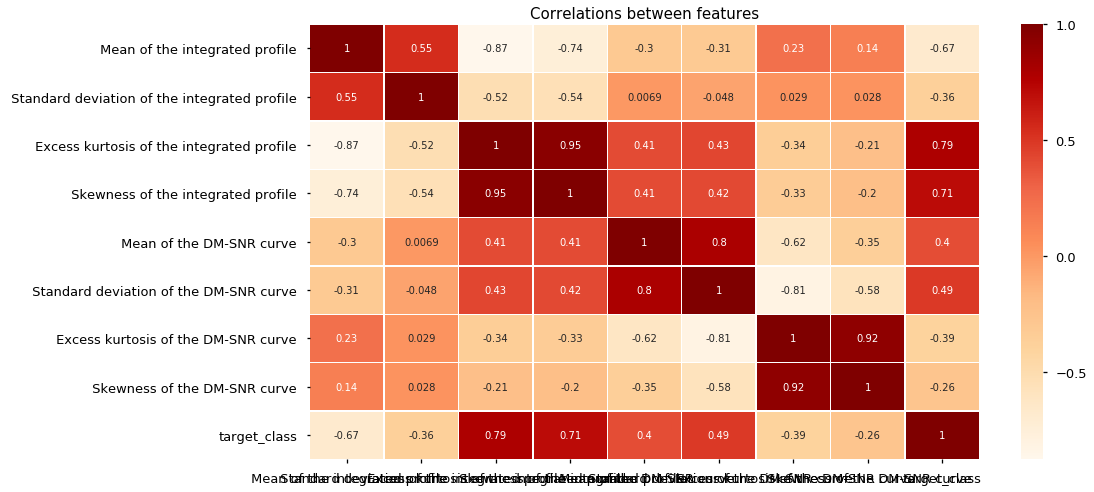

In [102]:
#Correlation between features
import seaborn as sns

plt.figure(figsize=(15,8))
cbar_kws = { 'ticks' : [-1, -0.5, 0, 0.5, 1], 'orientation': 'vertical'}
sns.heatmap(pulsar_df.corr(), cbar_kws=cbar_kws, cmap='OrRd', annot=True, linewidths=0.3)
plt.xticks(rotation=0)
plt.title("Correlations between features", fontsize=15)

In [103]:
X = pulsar_df.drop(['target_class'], axis=1).values
y = pulsar_df['target_class'].values

X[:1], y[:1]

(array([[140.5625    ,  55.68378214,  -0.23457141,  -0.6996484 ,
           3.19983278,  19.11042633,   7.97553179,  74.24222492]]),
 array([0], dtype=int64))

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                          y,
                          test_size=0.2)

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14318, 8)
(14318,)
(3580, 8)
(3580,)


In [194]:
#Multilayer Perceptron with optimization by default
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the accuracy
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

97.70949720670392% accuracy
MSE : 0.022905027932960894
RMSE : 0.15134407135055172
r2_score : 0.7306749456872761


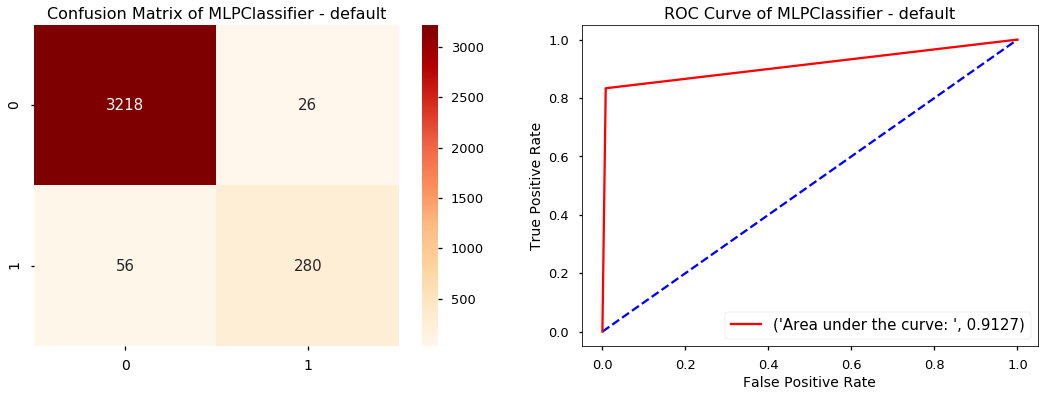

In [195]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18,13))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix of MLPClassifier - default', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)
plt.savefig('6_p_a.png')


from sklearn.metrics import roc_curve, auc
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve of MLPClassifier - default', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('5_p_a.png')


In [107]:
#Implementation of GridSearchCV class 
scaler = StandardScaler()
clf = MLPClassifier()
steps = [('normalizer', scaler), ('classifier', clf)]
pipe = Pipeline(steps)

In [108]:
params = \
    {'classifier__solver': ['sgd'], 
     'classifier__max_iter': [300, 500, 700], 
     'classifier__alpha': 10.0 ** -np.arange(0, 5), 
     'classifier__learning_rate_init': 10.0 ** -np.arange(0, 5), 
     'classifier__hidden_layer_sizes': np.arange(5, 7)}

grid_search = GridSearchCV(pipe, params)

In [86]:
grid_search.fit(X_train, y_train)

print(grid_search.score(X_test, y_test))

grid_search.best_params_

0.9770949720670391


{'classifier__alpha': 0.0001,
 'classifier__learning_rate_init': 0.1,
 'classifier__max_iter': 700,
 'classifier__solver': 'sgd'}

In [196]:
#Multilayer Perceptron with settings for stochastic gradient descent optimization method

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score


eta = 0.1
lmbd = 0.0001
n_hidden_l = 12
epochs = 700

# creating the model
model = MLPClassifier(hidden_layer_sizes=(n_hidden_l,n_hidden_l), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs,solver='sgd')

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

97.01117318435755% accuracy
MSE : 0.02988826815642458
RMSE : 0.17288223782802148
r2_score : 0.648563648640714


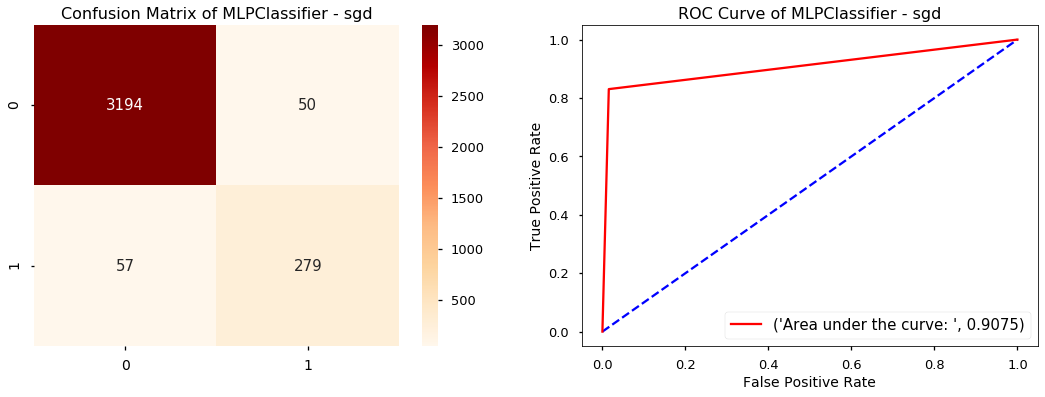

In [197]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18,13))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix of MLPClassifier - sgd', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)
plt.savefig('6_p_b.png')

from sklearn.metrics import roc_curve, auc
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve of MLPClassifier - sgd', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('5_p_b.png')

In [110]:
params = \
    {'classifier__solver': ['lbfgs'], 
     'classifier__max_iter': [300, 500, 700], 
     'classifier__alpha': 10.0 ** -np.arange(0, 5), 
     'classifier__learning_rate_init': 10.0 ** -np.arange(0, 5), 
     'classifier__hidden_layer_sizes': np.arange(5, 7)}

grid_search = GridSearchCV(pipe, params)

In [67]:
import warnings
warnings.filterwarnings('ignore')

#grid search of best parameters
grid_search.fit(X_train, y_train)

print(grid_search.score(X_test, y_test))

grid_search.best_params_

0.9801675977653631


{'classifier__alpha': 0.0001,
 'classifier__hidden_layer_sizes': 5,
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 700,
 'classifier__solver': 'lbfgs'}

In [204]:
#Multilayer Perceptron with settings for quasi-Newton group of methods

from sklearn.neural_network import MLPClassifier

eta = 0.001
lmbd = 0.0001
n_hidden_l = 5
epochs = 700

# creating the model
model = MLPClassifier(hidden_layer_sizes=(n_hidden_l), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs,solver='lbfgs')

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

98.04469273743017% accuracy
MSE : 0.019553072625698324
RMSE : 0.13983230179646736
r2_score : 0.770088368269626


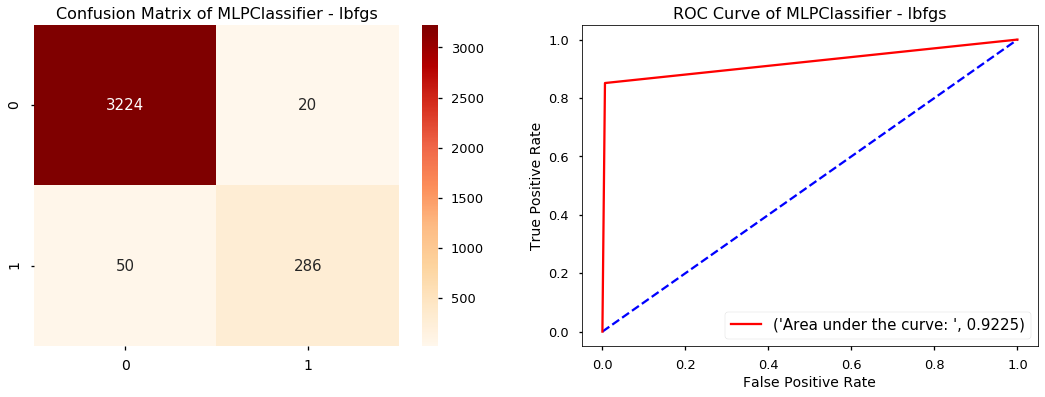

In [205]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18,13))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix of MLPClassifier - lbfgs', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)
plt.savefig('6_p_c.png')


from sklearn.metrics import roc_curve, auc
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve of MLPClassifier - lbfgs', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('6_p_c.png')


In [177]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

60.58657741765017% accuracy
MSE : 0.0335195530726257
RMSE : 0.18308345930920603
r2_score : 0.6058657741765017


In [209]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

78.96338129734015% accuracy
MSE : 0.01789081005586592
RMSE : 0.13375653275958493
r2_score : 0.7896338129734015


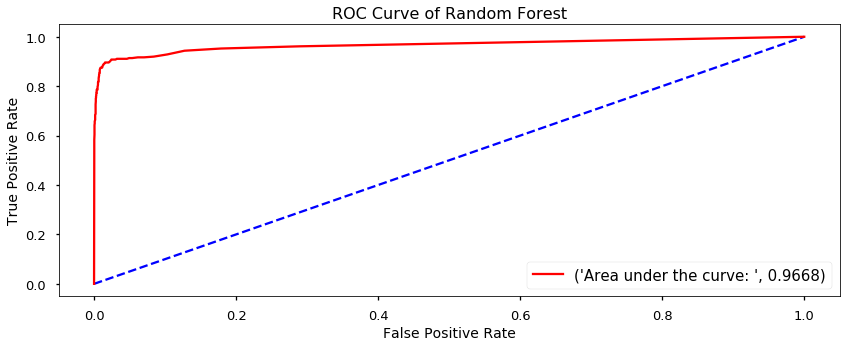

In [210]:
from sklearn.metrics import roc_curve, auc
#plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve of Random Forest', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('12_p.png')


In [230]:
#Without cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 0.021508379888268158
RMSE : 0.14665735538413394
r2_score : 0.7470972050965886


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

67.85716707725955% accuracy
MSE : 0.025719583182688167
RMSE : 0.16037326205664137
r2_score : 0.6785716707725955


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.62it/s]


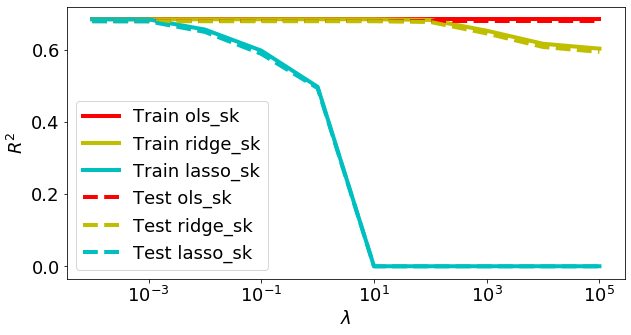

In [42]:
from sklearn.linear_model import Ridge, Lasso
import tqdm
import matplotlib.pyplot as plt

lambdas = np.logspace(-4, 5, 10)

train_errors = {
    "ols_sk": np.zeros(lambdas.size),
    "ridge_sk": np.zeros(lambdas.size),
    "lasso_sk": np.zeros(lambdas.size)
}

test_errors = {
    "ols_sk": np.zeros(lambdas.size),
    "ridge_sk": np.zeros(lambdas.size),
    "lasso_sk": np.zeros(lambdas.size)
}

for i, _lambda in enumerate(tqdm.tqdm(lambdas)):
    for key, method in zip(
        ["ols_sk", "ridge_sk", "lasso_sk"],
        [LinearRegression(), Ridge(alpha=_lambda), Lasso(alpha=_lambda)]
    ):
        method = method.fit(X_train, y_train)

        train_errors[key][i] = method.score(X_train, y_train)
        test_errors[key][i] = method.score(X_test, y_test)

fig = plt.figure(figsize=(10, 5))

colors = {
    "ols_sk": "r",
    "ridge_sk": "y",
    "lasso_sk": "c"
}

for key in train_errors:
    plt.semilogx(
        lambdas,
        train_errors[key],
        colors[key],
        label="Train {0}".format(key),
        linewidth=4.0
    )

for key in test_errors:
    plt.semilogx(
        lambdas,
        test_errors[key],
        colors[key] + "--",
        label="Test {0}".format(key),
        linewidth=4.0
    )
plt.legend(loc="best", fontsize=18)
plt.xlabel(r"$\lambda$", fontsize=18)
plt.ylabel(r"$R^2$", fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

_lambda = 0.1
# creating the model
model = Ridge(alpha=_lambda)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

67.85714125314173% accuracy
MSE : 0.02571960384625406
RMSE : 0.1603733264799794
r2_score : 0.6785714125314174


In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

_lambda = 0.001
# creating the model
model = Lasso(alpha=_lambda)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

67.8205845347468% accuracy
MSE : 0.02574885526792884
RMSE : 0.1604644984659499
r2_score : 0.678205845347468


In [182]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

75.63936983011587% accuracy
MSE : 0.020717750003972243
RMSE : 0.1439366180093594
r2_score : 0.7563936983011587


In [239]:
# Support Vector machines training: Kernel - Gaussian
from sklearn.svm import SVC  

# creating the model
model = SVC()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
#r2 = r2_score(y_test, y_pred)
#print("r2_score :", r2)


97.29050279329608% accuracy
MSE : 0.027094972067039105
RMSE : 0.16460550436434107


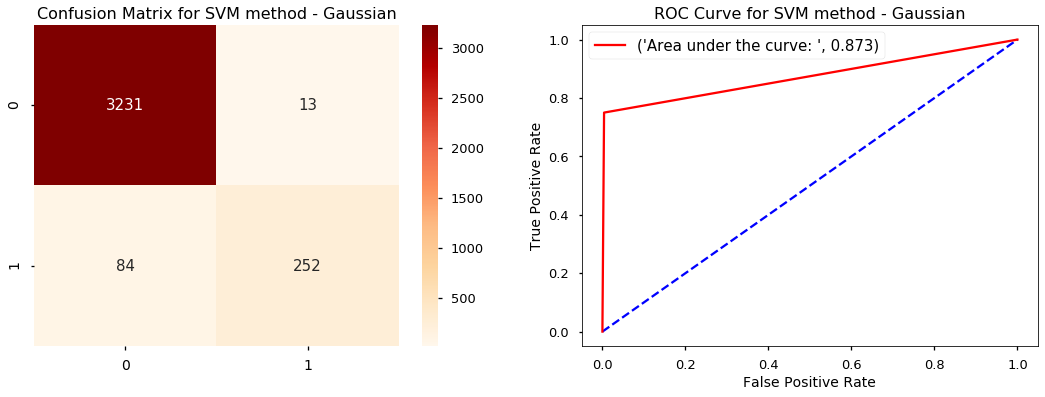

In [240]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18,13))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix for SVM method - Gaussian', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)
plt.savefig('8_p_a.png')


from sklearn.metrics import roc_curve, auc
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve for SVM method - Gaussian', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('9_p_a.png')


In [237]:
# Support Vector machines training: Kernel - Polinomial

from sklearn.svm import SVC  

# creating the model
model = SVC(kernel='poly')

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
#r2 = r2_score(y_test, y_pred)
#print("r2_score :", r2)


97.23463687150839% accuracy
MSE : 0.0276536312849162
RMSE : 0.1662938101220734


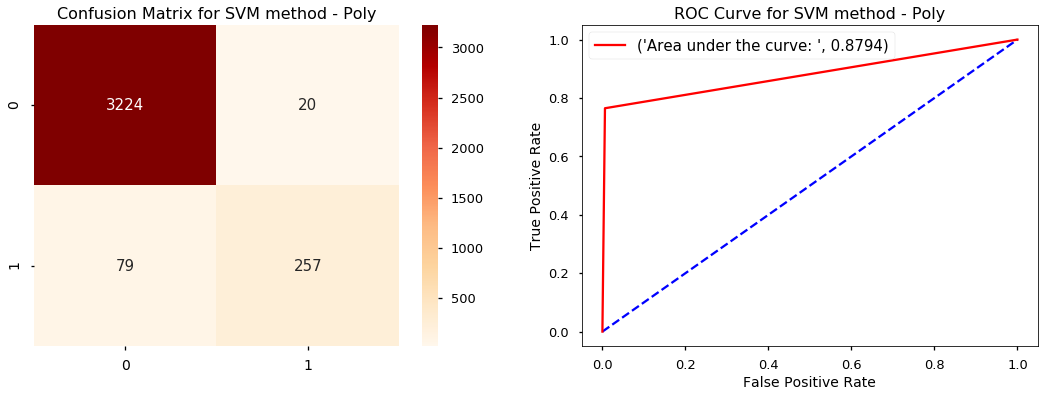

In [238]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18,13))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix for SVM method - Poly', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)
plt.savefig('8_p_b.png')


from sklearn.metrics import roc_curve, auc
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve for SVM method - Poly', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('9_p_b.png')


In [235]:
# Support Vector machines training: Kernel - Polinomial

from sklearn.svm import SVC  

# creating the model
model = SVC(kernel='sigmoid')

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) 
print(str(accuracy * 100) + "% accuracy")

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
#r2 = r2_score(y_test, y_pred)
#print("r2_score :", r2)


92.56983240223464% accuracy
MSE : 0.07430167597765364
RMSE : 0.27258333767428566


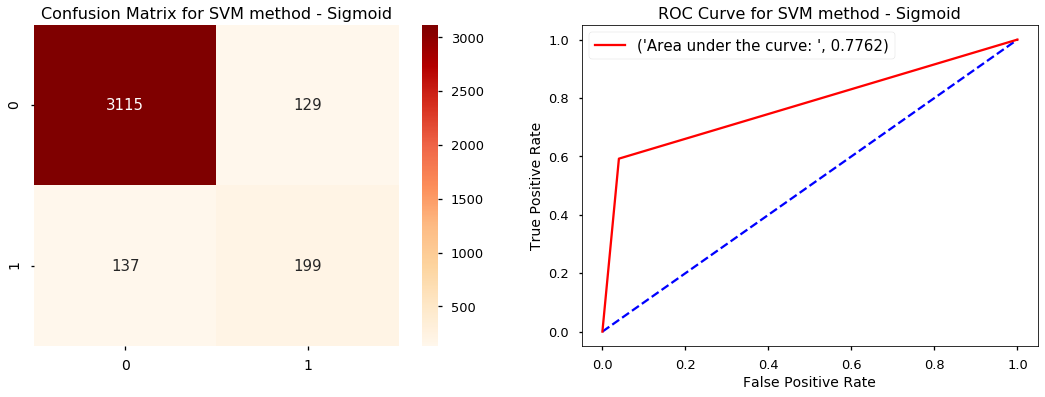

In [236]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18,13))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix for SVM method - Sigmoid', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)
plt.savefig('8_p_c.png')


from sklearn.metrics import roc_curve, auc
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
plt.title('ROC Curve for SVM method - Sigmoid', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best', fontsize=15)
plt.savefig('9_p_c.png')


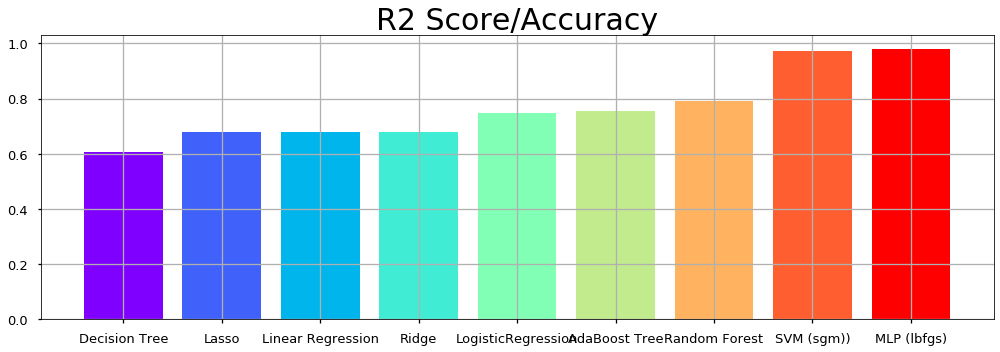

<Figure size 1008x360 with 0 Axes>

In [232]:
r2_score = np.array([0.679, 0.679, 0.678,0.747,0.980,0.790,0.606,0.756,0.973])
labels = np.array(['Linear Regression','Ridge','Lasso','LogisticRegression','MLP (lbfgs)','Random Forest', 'Decision Tree', 'AdaBoost Tree','SVM (sgm))'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (14, 5)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score/Accuracy', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()
plt.savefig('10_p.png')
